In [22]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [23]:
train_data = pd.read_csv('train.csv')

In [24]:
train_data.shape

(20800, 5)

In [25]:
train_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [26]:
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [27]:
train_data.dropna(inplace=True)

In [28]:
train_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [29]:
train_data.shape

(18285, 5)

In [30]:
train_data.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [31]:
data = train_data.reset_index(drop=True)

In [32]:
data.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [35]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [36]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter ch

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 2000,ngram_range=(1,4))
X = cv.fit_transform(corpus).toarray()
y = data['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train, y_train)

y_pred=mb.predict(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

print("TRAIN DATA accuracy:", mb.score(X_train,y_train))

print("TEST data accuracy: ", mb.score(X_test,y_test))

[[2802  351]
 [ 305 2028]]
TRAIN DATA accuracy: 0.8887413079146809
TEST data accuracy:  0.8804228946409042


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range= (1,5),max_features= 4000)
x_new = tf.fit_transform(corpus).toarray()

X_final = pd.DataFrame(x_new, columns= tf.get_feature_names())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train, y_train)

y_pred_tfid = mb.predict(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred_tfid,y_test))

print("TRAIN DATA accuracy:", mb.score(X_train,y_train))

print("TEST data accuracy: ", mb.score(X_test,y_test))

[[2950  433]
 [ 157 1946]]
TRAIN DATA accuracy: 0.9035080865692632
TEST data accuracy:  0.8924535180459351


In [41]:
import tensorflow as tf

In [42]:
tf.__version__

'2.5.0'

In [46]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


In [48]:
size_voc = 5000

onehot_repr=[one_hot(words,size_voc)for words in corpus] 
onehot_repr[0]

[3920,
 3363,
 728,
 2164,
 4487,
 2911,
 351,
 4301,
 2121,
 1050,
 3219,
 1931,
 4583,
 3783,
 4301,
 2121,
 4935,
 3517,
 3390,
 3224,
 4102,
 2125,
 3785,
 2568,
 1217,
 1988,
 3497,
 2755,
 2665,
 1176,
 132,
 3897,
 4435,
 113,
 3237,
 1833,
 3703,
 4313,
 4011,
 2911,
 2260,
 3920,
 4507,
 728,
 1902,
 2578,
 3973,
 788,
 1909,
 4435,
 113,
 4248,
 2774,
 2911,
 3471,
 2466,
 351,
 866,
 3703,
 1902,
 3903,
 1565,
 273,
 2055,
 3176,
 3903,
 1139,
 4025,
 4507,
 4835,
 401,
 4433,
 2911,
 2313,
 2910,
 1050,
 3308,
 3449,
 401,
 2751,
 788,
 2911,
 3275,
 3449,
 2751,
 4507,
 4025,
 380,
 3920,
 3897,
 1606,
 1249,
 401,
 3172,
 1148,
 3903,
 4354,
 4354,
 1591,
 4487,
 3709,
 208,
 4738,
 4327,
 351,
 1022,
 1249,
 401,
 4635,
 4301,
 2121,
 707,
 2688,
 3237,
 1665,
 1050,
 3703,
 4215,
 4738,
 3703,
 4098,
 2036,
 3903,
 1203,
 4308,
 4968,
 1677,
 1984,
 4301,
 2121,
 4136,
 4583,
 1776,
 788,
 1677,
 2911,
 3169,
 2858,
 1148,
 3903,
 4924,
 1399,
 1677,
 788,
 3811,
 4198,

In [54]:
sent_length=250
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[1622  753 1646 ... 1204 4725 3652]
 [  89 3297  989 ...  682 4921 4045]
 [1684 1910  788 ...  130 3051 2119]
 ...
 [4039 1305 4905 ... 1089 1676 1821]
 [   0    0    0 ... 1025 2613 2132]
 [4355 2680 3696 ... 1725  164 4824]]


In [52]:
len(corpus[0])

2849

In [55]:
embedded_docs[0]

array([1622,  753, 1646, 2260, 2953, 3920, 4507,  728, 3133,  351, 1565,
       4368, 2121, 1755,  728, 4130, 4871, 3920, 4507, 2164,  788, 2911,
        351, 1799, 2313, 2612, 2269, 4507, 4025,  380, 4835,  401, 1637,
       2911,  351, 3449, 2751, 2710, 4507, 4025,  380, 1637, 4635, 1249,
        486, 4197,  401, 4301, 2121, 1050, 3934, 1090, 3551, 4487, 3022,
       3067, 3703, 4313, 1989, 2121, 3387,  401, 2751, 2183, 1590, 2363,
       2688,  465, 4968, 1214, 2121, 4637, 2125, 3551, 4507, 3215,  788,
       4030, 2260,  728, 3934, 2878, 2269, 4282,  291, 1144, 2376, 2911,
       2647, 3783, 3625,  351, 2121, 3449, 2295, 1799, 2774, 1850, 2783,
       1565, 1399, 3241, 3256, 3325, 3411, 2164, 4003, 1677, 3325, 3411,
       4003, 2911, 2976, 4566, 1612, 1953, 1905, 4003, 3701, 2121, 1217,
       2303, 1399, 4990, 1593, 3219,  685, 1902, 2578, 2600, 2193, 3706,
       2164, 3229, 3275, 4025,  380, 4758, 3565, 1497,  465, 1255, 2168,
        994, 1582,  788, 4412, 2578, 2121, 4075, 40

In [56]:

## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(size_voc,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 40)           200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
embedded_docs.shape

(18285, 250)

In [59]:
 data['label'].shape

(18285,)

In [61]:
X_final_lstm = np.array(embedded_docs)
print(X_final_lstm.shape)

(18285, 250)


In [62]:
y = data['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final_lstm, y, test_size=0.33, random_state=42)

In [63]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 60s 295ms/step - loss: 0.3673 - accuracy: 0.8376 - val_loss: 0.2292 - val_accuracy: 0.9104
Epoch 2/10
192/192 [==============================] - 58s 304ms/step - loss: 0.1668 - accuracy: 0.9404 - val_loss: 0.2161 - val_accuracy: 0.9158
Epoch 3/10
192/192 [==============================] - 57s 299ms/step - loss: 0.1183 - accuracy: 0.9595 - val_loss: 0.2308 - val_accuracy: 0.9114
Epoch 4/10
192/192 [==============================] - 57s 297ms/step - loss: 0.0885 - accuracy: 0.9709 - val_loss: 0.2318 - val_accuracy: 0.9191
Epoch 5/10
192/192 [==============================] - 57s 296ms/step - loss: 0.0712 - accuracy: 0.9771 - val_loss: 0.2723 - val_accuracy: 0.9170
Epoch 6/10
192/192 [==============================] - 57s 298ms/step - loss: 0.0602 - accuracy: 0.9795 - val_loss: 0.2993 - val_accuracy: 0.9162
Epoch 7/10
192/192 [==============================] - 58s 302ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.3296 - val_ac

In [65]:
################### test data prediction #####################################
y_pred=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
print("confusion-matrix:\n" ,confusion_matrix(y_test,y_pred))
from sklearn.metrics import accuracy_score
print("accuracy_score:", accuracy_score(y_test,y_pred))

c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


confusion-matrix:
 [[3137  282]
 [ 425 2191]]
accuracy_score: 0.8828500414250207


In [68]:
## Creating model and adding dropouts
from tensorflow.keras.layers import Dropout
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(size_voc,embedding_vector_features,input_length=sent_length))
model1.add(Dropout(0.5))
model1.add(LSTM(100))
model1.add(Dropout(0.5))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 40)           200000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 250, 40)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 38s 188ms/step - loss: 0.3692 - accuracy: 0.8340 - val_loss: 0.2384 - val_accuracy: 0.9070
Epoch 2/10
192/192 [==============================] - 41s 215ms/step - loss: 0.1649 - accuracy: 0.9417 - val_loss: 0.2450 - val_accuracy: 0.8984
Epoch 3/10
192/192 [==============================] - 44s 227ms/step - loss: 0.1390 - accuracy: 0.9527 - val_loss: 0.2324 - val_accuracy: 0.9137
Epoch 4/10
192/192 [==============================] - 48s 249ms/step - loss: 0.1025 - accuracy: 0.9672 - val_loss: 0.2180 - val_accuracy: 0.9196
Epoch 5/10
192/192 [==============================] - 50s 261ms/step - loss: 0.0830 - accuracy: 0.9726 - val_loss: 0.2710 - val_accuracy: 0.9148
Epoch 6/10
192/192 [==============================] - 50s 259ms/step - loss: 0.0723 - accuracy: 0.9762 - val_loss: 0.2797 - val_accuracy: 0.9171
Epoch 7/10
192/192 [==============================] - 54s 280ms/step - loss: 0.0656 - accuracy: 0.9777 - val_loss: 0.2492 - val_ac

In [70]:
### NOTE: Accuracy incresed to 98.3 percent after adding dropout layers

In [71]:
################### test data prediction #####################################
y_pred_dp =model1.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
print("confusion-matrix:\n" ,confusion_matrix(y_test,y_pred_dp))
from sklearn.metrics import accuracy_score
print("accuracy_score:", accuracy_score(y_test,y_pred_dp))

c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


confusion-matrix:
 [[3155  264]
 [ 233 2383]]
accuracy_score: 0.9176470588235294


In [72]:
test_data = pd.read_csv('test.csv')

In [73]:
test_data.shape

(5200, 4)

In [74]:
test_data.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [75]:
test_data.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [76]:
test_data.dropna(inplace=True)

In [77]:
test_data.shape

(4575, 4)

In [78]:
data_test = test_data.reset_index(drop=True)
print(data_test.shape)

(4575, 4)


In [79]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus_test = []
for i in range(0, len(data_test)):
    review = re.sub('[^a-zA-Z]', ' ', data_test['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_test.append(review)

In [80]:
corpus_test[0]

'palo alto calif year scorn polit process silicon valley leapt fray prospect presid donald j trump push tech commun move beyond tradit role donor embrac new exist agit activist distinguish ventur capit firm emblazon corpor home page earthi epithet one promin tech chieftain say consequ mr trump elect would rang disastr terribl anoth compar dictat nearli tech leader sign open letter decri mr trump campaign anger bigotri quit action peter thiel founder paypal palantir first outsid investor facebook spoke republican convent juli new york time report saturday mr thiel give million support mr trump candidaci even support flee also recent gave million super pac support senat rob portman republican freshman run ohio get involv polit use seen clash silicon valley valu system transform world make problem obsolet solv washington entrepreneur want alien whatev segment custom agre polit retic longer style bunch nerd use lot limelight said dave mcclure investor run tech incub call startup quot great

In [81]:
data_test['text'][0]

'PALO ALTO, Calif.  —   After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy   epithet. One prominent tech chieftain says the consequences of Mr. Trump’s election would “range between disastrous and terrible. ” Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of “anger” and “bigotry. ” Not quite all the action is  . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported on Saturday that Mr. Thiel is giving $1. 25 million to support Mr. Trump’s candidacy even as other supporters flee. (He also recently gave $1 mil

In [83]:
test_data_corpus = np.array(corpus_test)

In [87]:
test_data_corpus.shape


(4575,)

In [88]:
X_test.shape

(6035, 250)

In [89]:
size_voc = 5000

onehot_repr_test=[one_hot(words,size_voc)for words in test_data_corpus] 


sent_length=250
embedded_docs_test=pad_sequences(onehot_repr_test,padding='pre',maxlen=sent_length)
print(embedded_docs_test)

[[3541  779 3647 ... 1112 2027 4467]
 [1203  324 2351 ... 4933 3438 4583]
 [3212  707 2363 ... 3018 2037 1212]
 ...
 [1081 1232 3450 ... 1250  736 4649]
 [1224 3153 4770 ... 4369 2902 4599]
 [2160 1804  710 ... 3831  235 4934]]


In [90]:
embedded_docs_test.shape

(4575, 250)

In [91]:
y_pred_dp_test_data =model1.predict_classes(embedded_docs_test)

In [92]:
y_pred_dp_test_data

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [94]:
data_final_file = pd.DataFrame(y_pred_dp_test_data,columns = ['predicted_test_data'])

In [95]:
data_final_file

,predicted_test_data
0,0
1,1
2,0
3,1
4,0
...,...
4570,0
4571,0
4572,0
4573,0


In [96]:
data_final_file.value_counts()

predicted_test_data
0                      2526
1                      2049
dtype: int64

<AxesSubplot:ylabel='Count'>

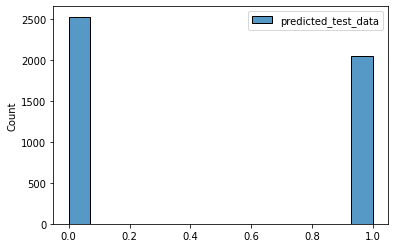

In [100]:
sns.histplot(data_final_file)

In [101]:
test_data_ip_op = pd.concat([data_test['text'],data_final_file],axis=1)

In [103]:
test_data_ip_op.head(10)

,text,predicted_test_data
0,"PALO ALTO, Calif. — After years of scorning...",0
1,Videos #NoDAPL: Native American Leaders Vow to...,1
2,"If at first you don’t succeed, try a different...",0
3,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
4,"Sunday on NBC’s “Meet the Press,” House Minori...",0
5,You are here: Home / *Articles of the Bound* /...,1
6,Have you seen that pro-Hillary TV ad of disgra...,1
7,"Source: CNBC, article by Robert Ferris Arctic ...",1
8,Written by Shaun Bradley Mandatory vaccinati...,1
9,Store Communists Terrorize Small Business The ...,1
